# Concept Notebook
### Outline
1. Parse a `.csv`/`.txt` file of a timeseries experiment
2. Plot

In [51]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Setup DataFrame

In [31]:
# File
df = pd.read_csv('dataset.csv',header=None,names=["Time","Grip Strength"])
df.set_index("Time",inplace=True)

### Plot

Text(0, 0.5, 'Grip Strength (g)')

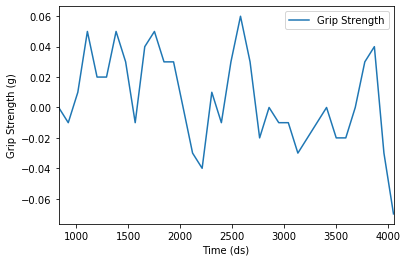

In [32]:
df.plot()
plt.xlabel('Time (ds)')
plt.ylabel("Grip Strength (g)")

### Regression

In [55]:
# Linear Regression
def linear_fit(xi, y):
    """
    Uses scipy.stats to run OLS
    """
    # Generated linear fit
    slope, intercept, r_value, p_value, std_err = stats.linregress(xi, y)
    line = slope * xi + intercept
    return slope, intercept, r_value, p_value, std_err, line

In [56]:
slope, intercept, r_value, p_value, std_err, line = linear_fit(
        df.index, df.iloc[:, 0].values
    )

In [57]:

f_quad = np.poly1d(np.polyfit(df.index, df.iloc[:, 0].values,2))
f_cubic = np.poly1d(np.polyfit(df.index, df.iloc[:, 0].values,3))

In [58]:
dff = df.copy()
dff["linear"] = line
dff["quadratic"] = f_quad(df.index)
dff["cubic"] = f_cubic(df.index)

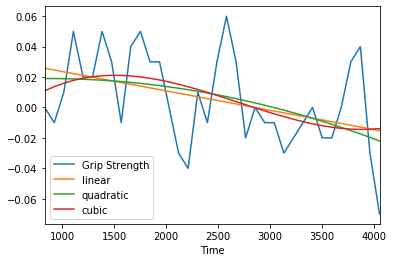

In [59]:
dff.plot()

### Outlier Detection

###  Forecasting